In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap 

In [33]:
df = pd.read_csv("AI_Impact_on_Jobs_2030.csv") 
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [34]:
df.shape

(3000, 18)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

**Basic descriptive statistics**

In [36]:
df.describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Check missing values

In [37]:
df.isnull().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

Check duplicates

In [38]:
df.drop_duplicates(inplace=True)
df.isnull().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

**Outlier detection: IQR for selected numeric columns**

In [39]:
numeric_cols_for_outliers = ["Average_Salary", "Years_Experience",
                             "AI_Exposure_Index", "Tech_Growth_Factor",
                             "Automation_Probability_2030"]

for col in numeric_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers, lower={lower:.2f}, upper={upper:.2f}")

Average_Salary: 0 outliers, lower=-32029.75, upper=209756.25
Years_Experience: 0 outliers, lower=-15.50, upper=44.50
AI_Exposure_Index: 0 outliers, lower=-0.46, upper=1.46
Tech_Growth_Factor: 0 outliers, lower=-0.01, upper=1.99
Automation_Probability_2030: 0 outliers, lower=-0.27, upper=1.28


-No outliers, duplicates detected in any variable.

*******************************************************************************

In [40]:
df['Job_Title'].unique()

array(['Security Guard', 'Research Scientist', 'Construction Worker',
       'Software Engineer', 'Financial Analyst', 'AI Engineer',
       'Mechanic', 'Teacher', 'HR Specialist', 'Customer Support',
       'UX Researcher', 'Lawyer', 'Data Scientist', 'Graphic Designer',
       'Retail Worker', 'Doctor', 'Truck Driver', 'Chef', 'Nurse',
       'Marketing Manager'], dtype=object)

In [41]:
df['Education_Level'].unique()

array(["Master's", 'PhD', 'High School', "Bachelor's"], dtype=object)

In [42]:
df['Risk_Category'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

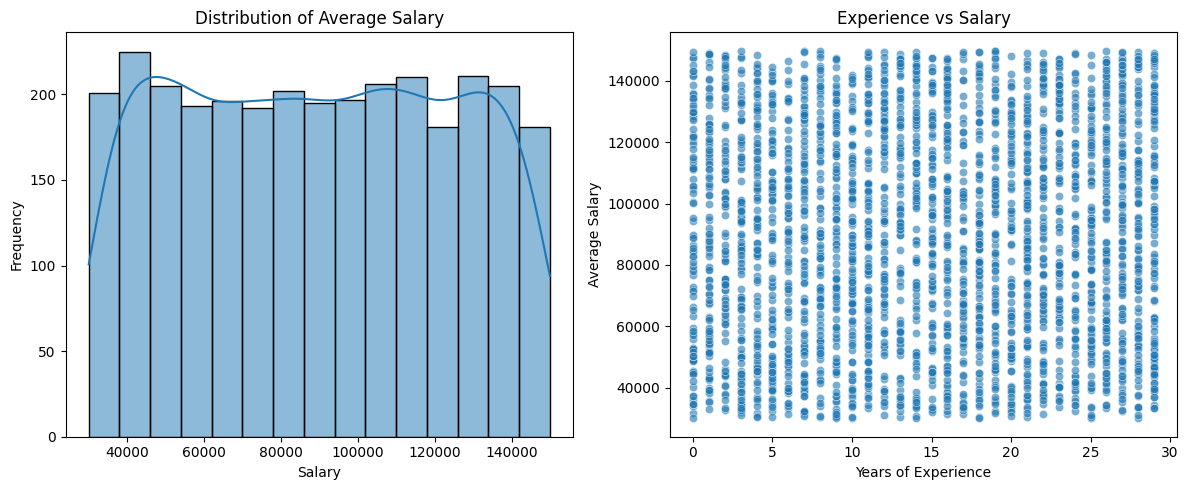

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.histplot(df["Average_Salary"], kde=True)
plt.title("Distribution of Average Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.scatterplot(
    x="Years_Experience",
    y="Average_Salary",
    data=df,
    alpha=0.6
)
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")

plt.tight_layout()
plt.show()


One-Hot Encoding (Nominal Data)

In [44]:
df_encoded = pd.get_dummies(
    df,
    columns=['Education_Level', 'Risk_Category'],
    drop_first=True
)

df_encoded.head()


,Job_Title,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,...,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Education_Level_High School,Education_Level_Master's,Education_Level_PhD,Risk_Category_Low,Risk_Category_Medium
0,Security Guard,45795,28,0.18,1.28,0.85,0.45,0.10,0.46,0.33,...,0.65,0.06,0.72,0.94,0.00,False,True,False,False,False
1,Research Scientist,133355,20,0.62,1.11,0.05,0.02,0.52,0.40,0.05,...,0.23,0.09,0.62,0.38,0.98,False,False,True,True,False
2,Construction Worker,146216,2,0.86,1.18,0.81,0.01,0.94,0.56,0.39,...,0.23,0.24,0.68,0.61,0.83,True,False,False,False,False
3,Software Engineer,136530,13,0.39,0.68,0.60,0.43,0.21,0.57,0.03,...,0.45,0.40,0.93,0.73,0.33,False,False,True,False,True
4,Financial Analyst,70397,22,0.52,1.46,0.64,0.75,0.54,0.59,0.97,...,0.28,0.30,0.17,0.02,0.42,True,False,False,False,True


**Target Variable**

We predict Automation Probability (2030)

In [45]:
X = df_encoded.drop(['Job_Title', 'Automation_Probability_2030'], axis=1)
y = df_encoded['Automation_Probability_2030']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
target_col = "Automation_Probability_2030"
corr = df_encoded.corr(numeric_only=True)[target_col].sort_values(ascending=False)
corr.head(15)

Automation_Probability_2030    1.000000
Skill_1                        0.030947
Tech_Growth_Factor             0.025538
Skill_2                        0.024247
Education_Level_High School    0.018126
AI_Exposure_Index              0.014320
Skill_6                        0.011701
Skill_4                        0.005963
Skill_10                       0.002665
Skill_9                        0.001269
Education_Level_PhD           -0.002292
Risk_Category_Medium          -0.007039
Skill_7                       -0.010226
Average_Salary                -0.013367
Education_Level_Master's      -0.013494
Name: Automation_Probability_2030, dtype: float64

Correlation Heatmap (Before Modeling)

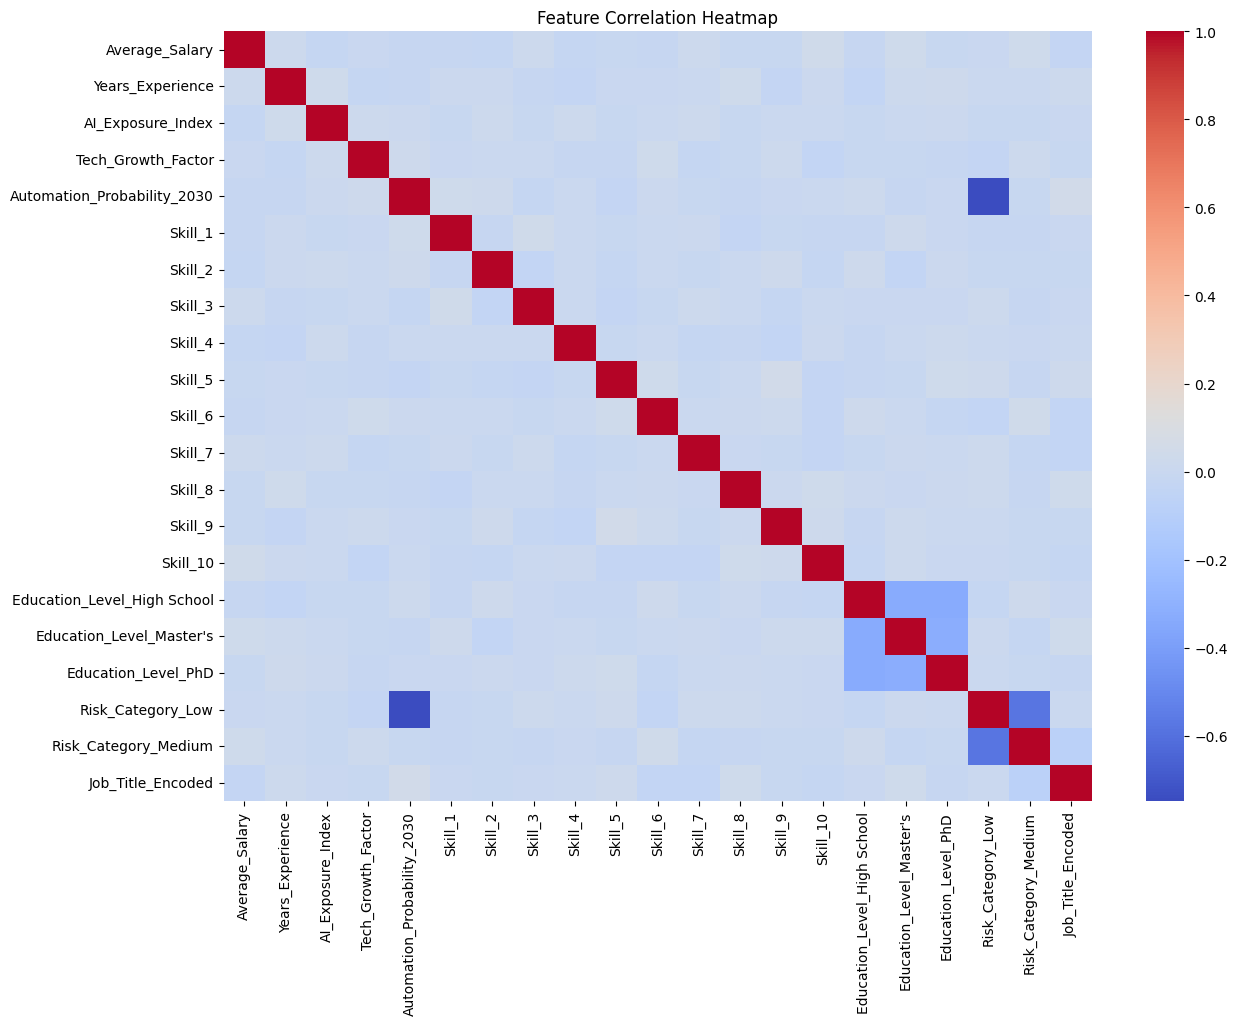

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['Job_Title_Encoded'] = le.fit_transform(df_encoded['Job_Title'])

df_encoded = df_encoded.drop('Job_Title', axis=1)
plt.figure(figsize=(14,10))
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Scatter plots of features vs target**

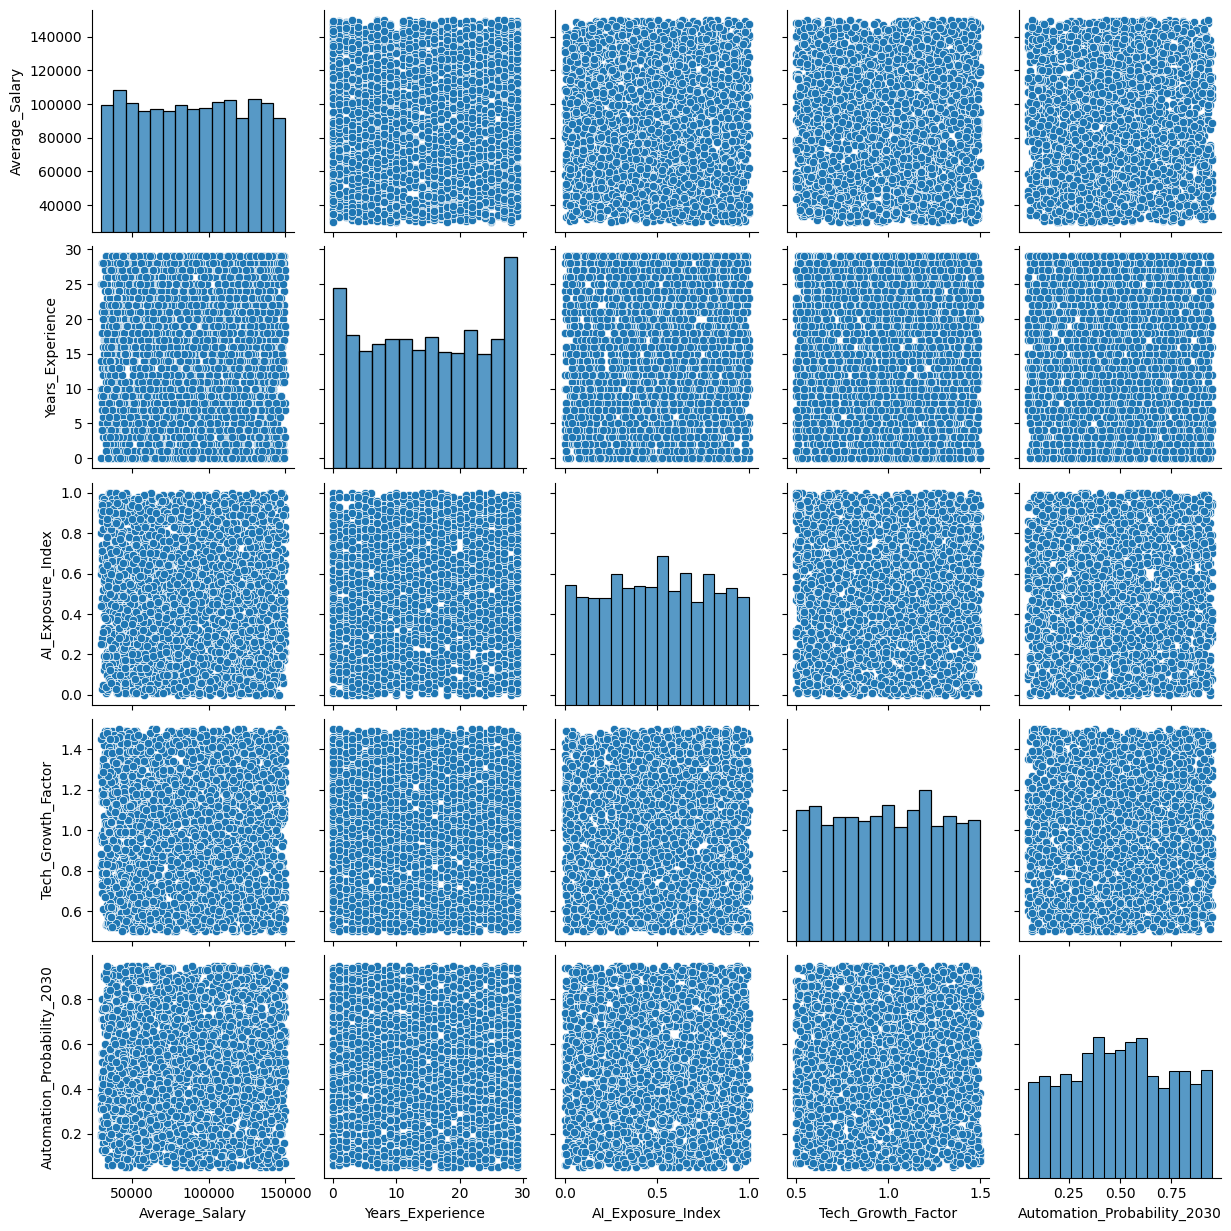

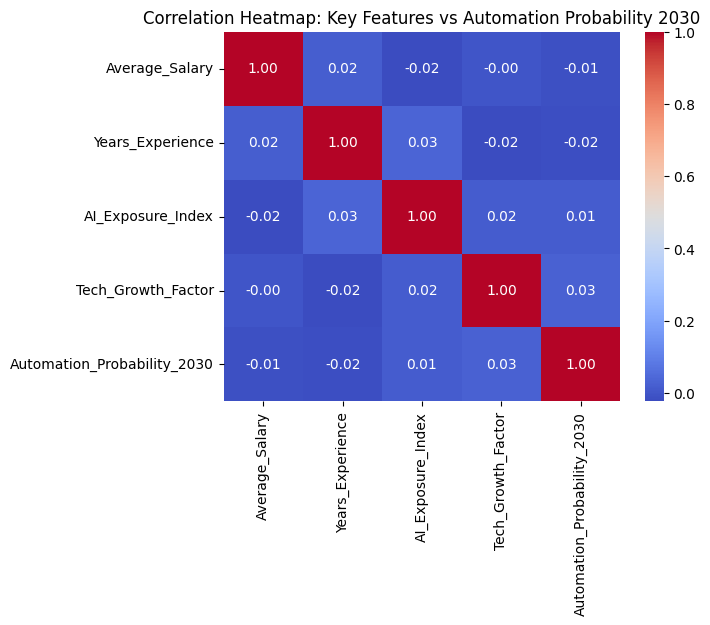

In [48]:

feat_cols = [
    "Average_Salary",
    "Years_Experience",
    "AI_Exposure_Index",
    "Tech_Growth_Factor",
    "Automation_Probability_2030"
]

sns.pairplot(df[feat_cols])
plt.show()

corr_matrix = df[feat_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Key Features vs Automation Probability 2030")
plt.show()


**LinearRegression  model** 

In [49]:
models = {}
lr = LinearRegression()
lr.fit(X_train, y_train)
models["Linear"] =lr
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lr, r2_lr

(0.008597642659064238, 0.8653245831779673)

In [50]:
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
models["Ridge"] = ridge

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_ridge, r2_ridge

(0.008596498377477755, 0.8653425074632317)

In [51]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
models["Lasso"] = lasso

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_lasso, r2_lasso

(0.008973241277697974, 0.8594411215678307)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( n_estimators=100,random_state=42)
rf.fit(X_train, y_train)

models["RandomForest"] = rf

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(0.008768809116666668, 0.862643393119521)

In [53]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
models["DecisionTree"] = dt
y_pred_dt = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt

(0.008944612293774608, 0.8598895724393036)

Scatter plots of actual vs predicted for each model

In [54]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "Decision Tree", "Random Forest"],
    "MSE":   [mse_lr, mse_ridge, mse_lasso, mse_dt, mse_rf],
    "R2 Score": [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf]
})

results

,Model,MSE,R2 Score
0,Linear,0.008598,0.865325
1,Ridge,0.008596,0.865343
2,Lasso,0.008973,0.859441
3,Decision Tree,0.008945,0.859890
4,Random Forest,0.008769,0.862643


Based on model evaluation metrics, Ridge Regression is the best-performing model for this analysis. It achieved the lowest Mean Squared Error and highest R² score, indicating superior predictive accuracy and generalization. Additionally, Ridge regression effectively handles multicollinearity among features through L2 regularization, making it more stable and reliable than simple linear regression and tree-based models for this datase

**Explanation with visualizations**

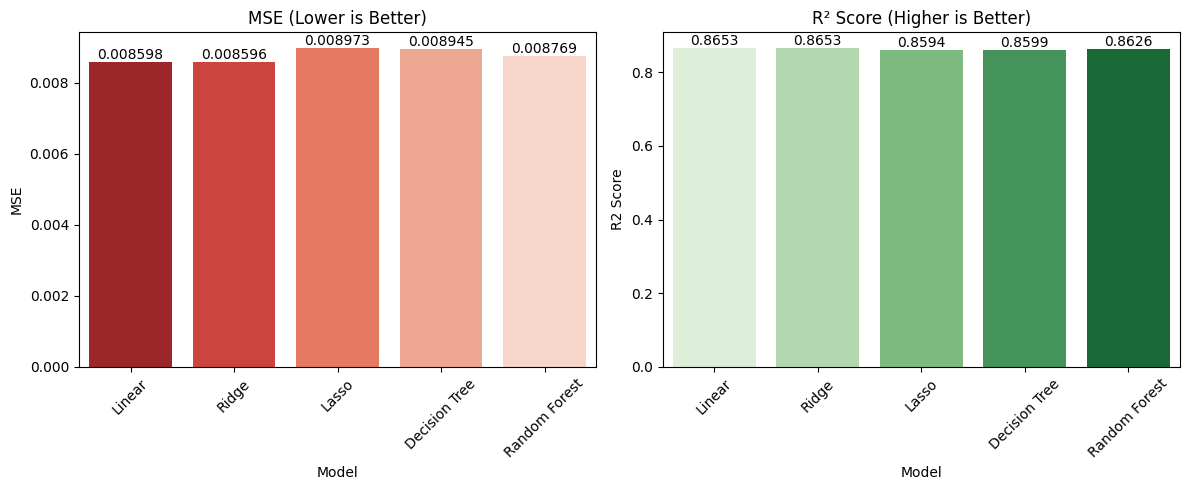

In [55]:
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest'],
    'MSE': [0.008598, 0.008596, 0.008973, 0.008945, 0.008769],
    'R2 Score': [0.865325, 0.865343, 0.859441, 0.859890, 0.8626]
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=results, x='Model', y='MSE', ax=ax1,hue='Model', palette='Reds_r')
ax1.set_title('MSE (Lower is Better)')
ax1.tick_params(axis='x', rotation=45)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.6f')

sns.barplot(data=results, x='Model', y='R2 Score', hue='Model', palette='Greens', legend=False, ax=ax2)
ax2.set_title('R² Score (Higher is Better)')
ax2.tick_params(axis='x', rotation=45)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.4f')

plt.tight_layout()
plt.show()


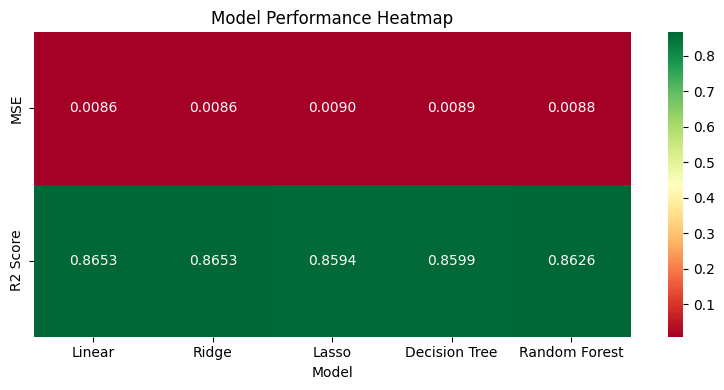

In [56]:
plt.figure(figsize=(8, 4))
sns.heatmap(results.set_index('Model').T, annot=True, fmt='.4f', cmap='RdYlGn')
plt.title('Model Performance Heatmap')
plt.tight_layout()
plt.show()

In [57]:
coef_df = pd.DataFrame({
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}, index=X.columns)

coef_df.head()

,Linear,Ridge,Lasso
Average_Salary,0.000821,0.000815,-0.0
Years_Experience,-0.002162,-0.002163,-0.0
AI_Exposure_Index,0.000411,0.000416,0.0
Tech_Growth_Factor,0.001350,0.001350,0.0
Skill_1,-0.000540,-0.000532,0.0


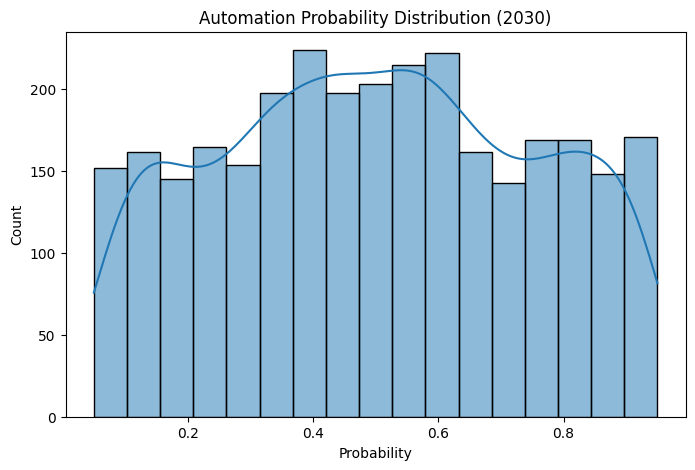

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df['Automation_Probability_2030'], kde=True)
plt.title("Automation Probability Distribution (2030)")
plt.xlabel("Probability")
plt.show()

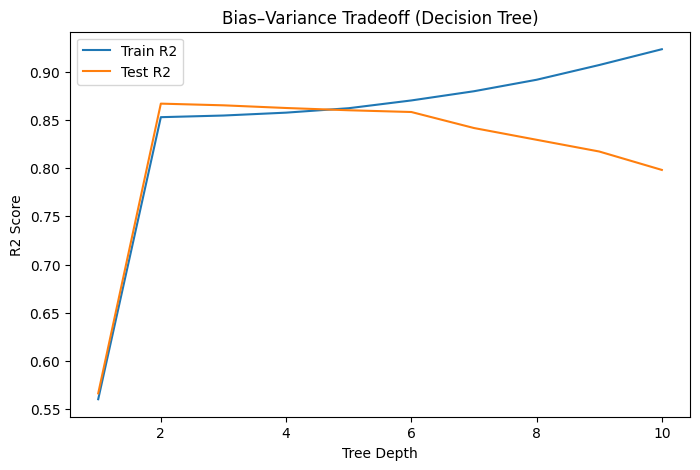

In [59]:
depths = range(1, 11)
train_scores = []
test_scores = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label='Train R2')
plt.plot(depths, test_scores, label='Test R2')
plt.xlabel("Tree Depth")
plt.ylabel("R2 Score")
plt.title("Bias–Variance Tradeoff (Decision Tree)")
plt.legend()
plt.show()


These depth vs performance plots illustrate the bias–variance trade-off for the Decision Tree. At very small depths, both training and testing R² are low and RMSE is high, so the model is too simple and underfits the data. As depth increases to a moderate level, testing R² becomes highest and close to training R² while testing RMSE is minimal, showing the best balance between fitting the pattern and generalizing to new jobs. At very large depths, training R² is almost 1 and training RMSE is near zero, but testing R² drops and testing RMSE increases, meaning the tree is overfitting by memorizing noise instead of learning a stable relationship

**Shap data analyzing**

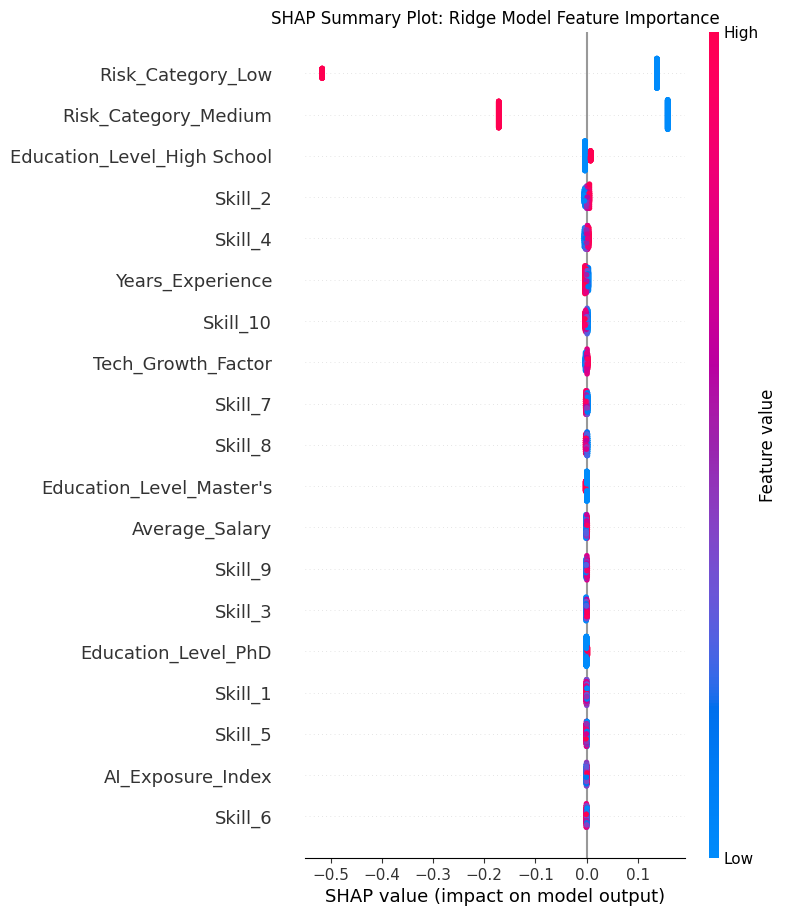

In [60]:
ridge = models['Ridge']  
explainer = shap.LinearExplainer(ridge, X_train) 
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('SHAP Summary Plot: Ridge Model Feature Importance')
plt.show()